# Data-preprocesing Pipeline
## 1. Basic Data Cleaning
### A. Label encoding
### B. Handling missing data
## 2. Data exploration
### A. Outlier detection
## 3. Feature engineering

# 1. Basic Data Cleaning

In [727]:
# Export the required libraries
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [728]:
# Read training data
df = pd.read_csv('Datasets/train.csv')

In [729]:
# Replace 'Nov-20' with '11-20' in the columns 'Stay' and 'Age'
df['Stay'].replace(['Nov-20'], '11-20', inplace=True)
df['Age'].replace(['Nov-20'], '11-20', inplace=True)

## A. Label Encoding

In [730]:
# Learn the categorical features
category = [feature for feature in df.columns if df[feature].dtype == 'O']
category

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay']

In [731]:
# Learn the unique categories of the categorical features
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print(f"Feature '{col_name}' has {unique_cat} unique categories")

Feature 'Hospital_type_code' has 7 unique categories
Feature 'Hospital_region_code' has 3 unique categories
Feature 'Department' has 5 unique categories
Feature 'Ward_Type' has 6 unique categories
Feature 'Ward_Facility_Code' has 6 unique categories
Feature 'Type of Admission' has 3 unique categories
Feature 'Severity of Illness' has 3 unique categories
Feature 'Age' has 10 unique categories
Feature 'Stay' has 11 unique categories


In [732]:
# Ordinal feature encoding
map_admin = {'Urgent' : 3, 'Emergency' : 2, 'Trauma' : 1}
map_ill = {'Extreme' : 3, 'Moderate' : 2, 'Minor' : 1}

df['Severity of Illness'] = df['Severity of Illness'].map(map_ill)
df['Type of Admission'] = df['Type of Admission'].map(map_admin)

In [733]:
# Numeric feature encoding
df['Age'] = df['Age'].map({'0-10': 0,
                          '11-20': 1,
                          '21-30': 2,
                          '31-40': 3,
                          '41-50': 4,
                          '51-60': 5,
                          '61-70': 6,
                          '71-80': 7,
                          '81-90': 8,
                          '91-100': 9
                         })

df['Stay'] = df['Stay'].map({'21-30': 2,
 '11-20': 1,
 '31-40': 3,
 '51-60': 5,
 '0-10': 0,
 '41-50': 4,
 '71-80': 7,
 'More than 100 Days': 10,
 '81-90': 8,
 '91-100': 9,
 '61-70': 6}
)

In [734]:
category = [feature for feature in df.columns if df[feature].dtype == 'O']
category

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code']

In [735]:
# Categorical feature encoding by one-hot encoding
# As the dimension will be too high if I transform all the categorical features
# I only translate 'Hospital_region_code' (3 categories) and 'Department' (an essential categorical feature comparing to others)

# Create a list of features to dummy
todummy_list = ['Hospital_region_code', 'Department']

In [736]:
# Function to dummy all the categorical variables
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(columns=x)
        df = pd.concat([df, dummies], axis=1)
    return df

In [737]:
df = dummy_df(df, todummy_list)
df.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,call night,Bed Grade,patientid,...,Admission_Deposit,Stay,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery
0,1,8,c,3,3,R,F,1,2.0,31397,...,4911,0,0,0,1,0,0,0,1,0
1,2,2,c,5,2,S,F,0,2.0,31397,...,5954,4,0,0,1,0,0,0,1,0
2,3,10,e,1,2,S,E,0,2.0,31397,...,4745,3,1,0,0,0,1,0,0,0
3,4,26,b,2,2,R,D,1,2.0,31397,...,7272,4,0,1,0,0,0,0,1,0
4,5,26,b,2,2,S,D,0,2.0,31397,...,5558,4,0,1,0,0,0,0,1,0


In [738]:
# Rest of the categorical data -> convert to numerical
# Check data categories
print(df['Hospital_type_code'].unique())

le = LabelEncoder()
df['Hospital_type_code'] = le.fit_transform(df['Hospital_type_code'])
df['Hospital_type_code'].head(6)

['c' 'e' 'b' 'a' 'f' 'd' 'g']


0    2
1    2
2    4
3    1
4    1
5    0
Name: Hospital_type_code, dtype: int32

In [739]:
# Check data categories
print(df['Ward_Type'].unique())

df['Ward_Type'] = le.fit_transform(df['Ward_Type'])
df['Ward_Type'].head(6)

['R' 'S' 'Q' 'P' 'T' 'U']


0    2
1    3
2    3
3    2
4    3
5    3
Name: Ward_Type, dtype: int32

In [740]:
# Check data categories
print(df['Ward_Facility_Code'].unique())

df['Ward_Facility_Code'] = le.fit_transform(df['Ward_Facility_Code'])
df['Ward_Facility_Code'].head(6)

['F' 'E' 'D' 'B' 'A' 'C']


0    5
1    5
2    4
3    3
4    3
5    5
Name: Ward_Facility_Code, dtype: int32

In [741]:
# # Rearrange list column (let Stay be the last)
# print(list(df.columns.values))
# df = df[['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Ward_Type', 'Ward_Facility_Code', 'call night', 'Bed Grade', 'patientid', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age', 'Admission_Deposit', 'Hospital_region_code_X', 'Hospital_region_code_Y', 'Hospital_region_code_Z', 'Department_TB & Chest disease', 'Department_anesthesia', 'Department_gynecology', 'Department_radiotherapy', 'Department_surgery', 'Stay']]

## B.Handling missing data

In [742]:
# Check the number of missing data
df.isnull().sum().sort_values(ascending=False).head()

City_Code_Patient          4532
Bed Grade                   113
case_id                       0
Age                           0
Department_radiotherapy       0
dtype: int64

In [743]:
# Use the mean to replace missing data
# Don't replace missing data of city_code_patient by mean since it will lead to a poor model
df['Bed Grade'] = df['Bed Grade'].fillna(df['Bed Grade'].mean())
df.isnull().sum().sort_values(ascending=False).head()

City_Code_Patient          4532
case_id                       0
Visitors with Patient         0
Department_radiotherapy       0
Department_gynecology         0
dtype: int64

## C. Basic feature engineering 

In [744]:
# Create additional features by the relationships between different columns (features)
df['sum_Admission_Deposit_per_illness']=df.groupby(['Severity of Illness'])['Admission_Deposit'].transform('sum')
df['sum_Admission_Deposit_per_admission']=df.groupby(['Type of Admission'])['Admission_Deposit'].transform('sum')
df['sum_Admission_Deposit_per_bed']=df.groupby(['Bed Grade'])['Admission_Deposit'].transform('sum')
#df['sum_Admission_Deposit_per_department']=df.groupby(['Department'])['Admission_Deposit'].transform('sum')
df['sum_Admission_Deposit_per_hosp']=df.groupby(['Hospital_code'])['Admission_Deposit'].transform('sum')

In [745]:
df['mean_Admission_Deposit_per_illness']=df.groupby(['Severity of Illness'])['Admission_Deposit'].transform('mean')
df['mean_Admission_Deposit_per_admission']=df.groupby(['Type of Admission'])['Admission_Deposit'].transform('mean')
df['mean_Admission_Deposit_per_bed']=df.groupby(['Bed Grade'])['Admission_Deposit'].transform('mean')
#df['mean_Admission_Deposit_per_department']=df.groupby(['Department'])['Admission_Deposit'].transform('mean')
df['mean_Admission_Deposit_per_hosp']=df.groupby(['Hospital_code'])['Admission_Deposit'].transform('mean')

## D. Remove useless data

In [746]:
# Case_id & patientid will not help in classification
df = df.drop(columns=['case_id', 'patientid'])
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,call night,Bed Grade,City_Code_Patient,Type of Admission,...,Department_radiotherapy,Department_surgery,sum_Admission_Deposit_per_illness,sum_Admission_Deposit_per_admission,sum_Admission_Deposit_per_bed,sum_Admission_Deposit_per_hosp,mean_Admission_Deposit_per_illness,mean_Admission_Deposit_per_admission,mean_Admission_Deposit_per_bed,mean_Admission_Deposit_per_hosp
0,8,2,3,3,2,5,1,2.0,7.0,2,...,1,0,269303142,561116896,599761755,18070530,4747.688627,4768.320609,4849.655578,4933.259623
1,2,2,5,2,3,5,0,2.0,7.0,1,...,1,0,269303142,759271759,599761755,25510660,4747.688627,4986.646344,4849.655578,5000.129361
2,10,4,1,2,3,4,0,2.0,7.0,1,...,0,0,269303142,759271759,599761755,42984606,4747.688627,4986.646344,4849.655578,4555.867091
3,26,1,2,2,2,3,1,2.0,7.0,1,...,1,0,269303142,759271759,599761755,161993571,4747.688627,4986.646344,4849.655578,4897.616731
4,26,1,2,2,3,3,0,2.0,7.0,1,...,1,0,269303142,759271759,599761755,161993571,4747.688627,4986.646344,4849.655578,4897.616731


In [747]:
# Drop the rows (patients) with missing values in 'City_Code_Patient'
# The total number of missing data is relatively small (total of xxx) compared with the dataset size of 318,438 rows.
# Thus, there won't be too much harm to the model by dropping these data.
# In fact, the model has shown an increase in accuracy by dropping these data.
df.isnull().sum().sort_values(ascending=False).head()
df.dropna(inplace=True)
df.isnull().sum().sort_values(ascending=False).head()

Hospital_code                           0
Hospital_region_code_Y                  0
mean_Admission_Deposit_per_bed          0
mean_Admission_Deposit_per_admission    0
mean_Admission_Deposit_per_illness      0
dtype: int64

# 2. Data exploration

In [748]:
# Read the statistics of pre-processed data
df.describe()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,call night,Bed Grade,City_Code_Patient,Type of Admission,...,Department_radiotherapy,Department_surgery,sum_Admission_Deposit_per_illness,sum_Admission_Deposit_per_admission,sum_Admission_Deposit_per_bed,sum_Admission_Deposit_per_hosp,mean_Admission_Deposit_per_illness,mean_Admission_Deposit_per_admission,mean_Admission_Deposit_per_bed,mean_Admission_Deposit_per_hosp
count,313906.000000,313906.000000,313906.000000,313906.000000,313906.000000,313906.000000,313906.000000,313906.000000,313906.000000,313906.000000,...,313906.000000,313906.000000,3.139060e+05,3.139060e+05,3.139060e+05,3.139060e+05,313906.000000,313906.000000,313906.000000,313906.000000
mean,18.322033,1.257329,4.778593,3.196540,1.889445,3.283993,0.501207,2.622953,7.251859,1.673992,...,0.089718,0.003641,6.367219e+08,6.059803e+08,4.844994e+08,7.531143e+07,4880.572806,4880.929639,4880.527719,4880.662215
std,8.635184,1.535247,3.102765,1.167886,0.804582,1.688923,0.499999,0.872461,4.745266,0.724849,...,0.285778,0.060233,2.503590e+08,1.821025e+08,1.568234e+08,4.213642e+07,77.172433,102.808256,90.449038,217.426715
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,2.693031e+08,2.338274e+08,5.170460e+05,6.815424e+06,4747.688627,4768.320609,4575.628319,4492.418728
25%,11.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,2.000000,4.000000,1.000000,...,0.000000,0.000000,4.278350e+08,5.611169e+08,2.857645e+08,4.298461e+07,4874.108733,4768.320609,4849.655578,4775.271324
50%,19.000000,1.000000,5.000000,3.000000,2.000000,4.000000,1.000000,3.000000,8.000000,2.000000,...,0.000000,0.000000,8.570779e+08,5.611169e+08,5.456315e+08,7.238972e+07,4874.108733,4821.084514,4934.135292,4897.616731
75%,26.000000,2.000000,7.000000,4.000000,2.000000,5.000000,1.000000,3.000000,8.000000,2.000000,...,0.000000,0.000000,8.570779e+08,7.592718e+08,5.997618e+08,9.532463e+07,4982.241371,4986.646344,4934.135292,5043.785014
max,32.000000,6.000000,13.000000,24.000000,5.000000,5.000000,1.000000,4.000000,38.000000,3.000000,...,1.000000,1.000000,8.570779e+08,7.592718e+08,5.997618e+08,1.619936e+08,4982.241371,4986.646344,4964.119237,5608.380551


<AxesSubplot:>

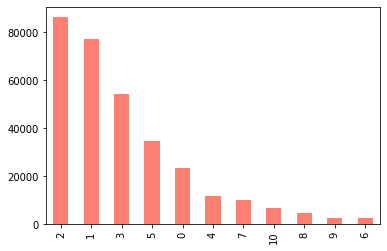

In [749]:
### Inspect the distribution of target feature
df.Stay.value_counts().plot(kind="bar", color = ['Salmon'])
# Insight: Most of the patients stay in hospital for 21-30 days, followed by 11-20, 31-40
# We can see that the distribution of the labels is significantly skewed to the right. 
# In other words, the data is not balanced. There are very few data samples in the categories from ‘41–50’ to ‘61–70’.
# This will have significant negative impact on prediction power.

In [ ]:
### Calculate correlation to determine multicollinearity
import seaborn as sns
figure = sns.heatmap(df.corr())

# Correlation matrix
df_corr = df.corr()

# Save correlation matrix for inspection
df_corr.to_csv('Datasets/preprocessed_v12_corr.csv', index=False)

In [750]:
# Delete features with high correlation
# Observation:
# 0.98: 'Type of Admission' & 'sum_Admission_Deposit_per_admission'
# 0.80: 'Type of Admission' & 'mean_Admission_Deposit_per_admission'
#df = df.drop(columns=['Severity of Illness', 'Bed Grade', 'Type of Admission'] )
df = df.drop(columns=['Severity of Illness','Type of Admission'] )

# 3. Data Normalization

In [751]:
# Assign X (features) and y (labels)
X = df.drop(['Stay'], axis = 1)
y = df['Stay']

In [752]:
X.shape

(313906, 28)

In [369]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline

# pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=10))])

# X = pipeline.fit_transform(X)

In [753]:
from sklearn.preprocessing import StandardScaler
for value in X.columns:
    sc = StandardScaler()
    X[value] = sc.fit_transform(X[[value]])

In [481]:
# save preprocessed data
df.to_csv('Datasets/preprocessed_v9.csv', index=False)

# 4. Model Building

In [754]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [519]:
X_train.shape

(254750, 30)

In [155]:
y_train

305797    3
139943    1
182403    2
12118     1
66747     2
         ..
122579    3
304137    3
152315    2
117952    3
305711    7
Name: Stay, Length: 254750, dtype: int64

In [755]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=0, objective='multi:softmax', num_class=11)
# xgb_model = xgb.XGBClassifier(n_estimators=100,
#                             max_depth=6,
#                             learning_rate=0.1,
#                             subsample=0.8,
#                             colsample_bytree=0.5,
                        
#                            ) 
xgb_model.fit(X_train, y_train)

C:\Users\jenni\anaconda3\envs\BMEG3103_pract\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_class=11, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [786]:
# Save the model
xgb_model.save_model("Model/model_v16_bestfornow.json")

# Model Evaluation

In [714]:
Yp = xgb_model.predict(X_test)
Yp

array([1, 5, 2, ..., 1, 2, 2], dtype=int64)

In [785]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Yp)
print(cm)

[[  781  2166  1574    40     6    15     1     1     0     0     1]
 [  474  7823  6276   665     8   489     0     2     5     1     7]
 [  346  4797 11332   248     4   248     0     4    35     1    19]
 [  163  1822  4441  2507    12  1744     1    26    21     4    30]
 [   97   413  1444   160     4   158     1     6     4     4    20]
 [   87   474   998  1561     3  3565     2    37   165     0    93]
 [   12    84   310    54     0    92     0     5     9     2    14]
 [   23   114   215   353     3  1051     1    73    30     5   124]
 [    9    23    51    92     3   447     0    15   204     0   118]
 [    8    25    49    64     1   277     0    11    10    12    57]
 [   15    46    68    98     3   370     0    48   110    13   525]]


In [784]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
print(accuracy_score(y_test, Yp) * 100)
print(precision_score(y_test, Yp, average='macro') * 100)

42.72880762001848
33.24980987173706


In [782]:
# https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362
from sklearn.metrics import classification_report
print(classification_report(y_test, Yp))

              precision    recall  f1-score   support

           0       0.39      0.17      0.24      4585
           1       0.44      0.50      0.47     15750
           2       0.42      0.67      0.52     17034
           3       0.43      0.23      0.30     10771
           4       0.09      0.00      0.00      2311
           5       0.42      0.51      0.46      6985
           6       0.00      0.00      0.00       582
           7       0.32      0.04      0.07      1992
           8       0.34      0.21      0.26       962
           9       0.29      0.02      0.04       514
          10       0.52      0.41      0.46      1296

    accuracy                           0.43     62782
   macro avg       0.33      0.25      0.26     62782
weighted avg       0.41      0.43      0.39     62782



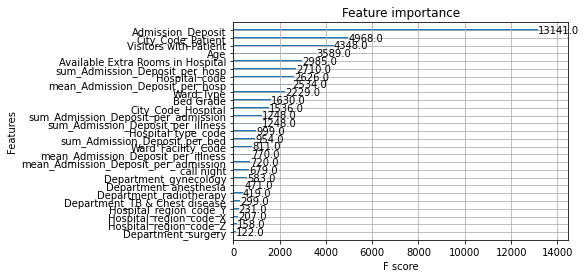

In [781]:
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import plot_importance
xgb_model.feature_importances_
plot_importance(xgb_model)
plt.show()

# Test Dataset Prediction & Submission

In [772]:
test = pd.read_csv('Datasets/preprocessed_test_v16.csv')
test.head()
# test =test.drop(['Hospital_region_code_X', 'Hospital_region_code_Y', 'Hospital_region_code_Z'], axis=1)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,call night,Bed Grade,City_Code_Patient,Visitors with Patient,...,Department_radiotherapy,Department_surgery,sum_Admission_Deposit_per_illness,sum_Admission_Deposit_per_admission,sum_Admission_Deposit_per_bed,sum_Admission_Deposit_per_hosp,mean_Admission_Deposit_per_illness,mean_Admission_Deposit_per_admission,mean_Admission_Deposit_per_bed,mean_Admission_Deposit_per_hosp
0,0.307627,0.487763,-0.566911,-0.165503,1.383073,-1.940856,-1.000168,-0.729986,-1.094641,-0.722758,...,-0.317027,-0.058283,0.880959,-0.237553,0.700047,-0.771083,-0.102237,-1.091217,-0.264517,0.734349
1,1.234125,-0.822919,-0.244563,-1.024428,1.383073,1.011415,-1.000168,-0.729986,-1.094641,0.402568,...,-0.317027,-0.058283,0.880959,0.840568,0.700047,-0.404567,-0.102237,1.031729,-0.264517,1.372250
2,0.886688,-0.167578,-0.889260,-0.165503,-1.102126,-0.169493,0.999832,1.571032,-1.094641,-0.160095,...,-0.317027,-0.058283,0.880959,-0.237553,-1.282764,2.065165,-0.102237,-1.091217,0.782375,0.096284
3,-1.429558,-0.822919,0.400134,-0.165503,-1.102126,1.011415,0.999832,-0.729986,-1.094641,-0.160095,...,-0.317027,-0.058283,0.880959,0.840568,0.700047,0.417472,-0.102237,1.031729,-0.264517,-1.371062
4,1.118313,-0.167578,2.011876,-1.024428,0.140473,1.011415,0.999832,-0.729986,-1.094641,0.402568,...,-0.317027,-0.058283,0.880959,0.840568,0.700047,0.163806,-0.102237,1.031729,-0.264517,-0.414427


In [773]:
# Test model on test set
test_y = xgb_model.predict(test)
test_y

array([0, 5, 2, ..., 1, 1, 5], dtype=int64)

In [775]:
test_y_result = pd.read_csv('Results/test_sub_template.csv')
test_y_result.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [776]:
# test_y_df.drop(columns=['result'], inplace=True)
test_y_result['Stay'] = test_y
test_y_result

,case_id,Stay
0,318439,0
1,318440,5
2,318441,2
3,318442,2
4,318443,5
...,...,...
137052,455491,2
137053,455492,0
137054,455493,1
137055,455494,1


In [777]:
# Map 0-10 Stay results to original 0-10, 11-20 etc
dict_col = {'0-10':[0], '11-20':[1], '21-30':[2], '31-40':[3], '41-50':[4], '51-60':[5], '61-70':[6], '71-80':[7], '81-90':[8], '91-100':[9], 'More than 100 Days':[10]}
d = {k: oldk for oldk, oldv in dict_col.items() for k in oldv}
print(d)

# test_y_df = pd.DataFrame(("Light_Red", 'Light_Blue'), columns=["Colors"])
# df["Colors"].map(dict_col)

{0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'}


In [778]:
test_y_result['Stay'] = test_y_result['Stay'].map(d)
test_y_result

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,21-30
137053,455492,0-10
137054,455493,11-20
137055,455494,11-20


In [779]:
test_y_result.groupby(['Stay'])['case_id'].count()

Stay
0-10                   4322
11-20                 39256
21-30                 58039
31-40                 12972
41-50                    97
51-60                 18408
61-70                    23
71-80                   470
81-90                  1273
91-100                   79
More than 100 Days     2118
Name: case_id, dtype: int64

In [780]:
# Save submission results
test_y_result.to_csv('Results/test_sub_v16.csv',index=False)